## 통계적 가설검정

1) 귀무가설과 대립가설
   - 귀무가설 : 대립가설의 반대가설
   - 대립가설 : 입증하려는 가설

2) P-value 
   - 귀무가설이 참이라는 전제하에 우리가 관측한 검정통계량의 값이나 혹은 그보다 더 극단적인 값을 얻을 확률


3) 단일변수
   - 연속형 : 정규성 검정(ex - 매출액/온도가 정규분포를 따르는지 여부) / One Sample T Test (1표본 평균 검정) - (하나의 값과 집단의 평균을 비교 - 아들 수능 성적 & 전체 수능 평균)
   - 범주형 : 비율 검정 
   
4) 다변수
   - X 범주형 / Y 연속형 : (ex - 부서에 따른 매출액)
        - Two Sample T Test와 등분산 검정은 Y가 정규성을 띌 경우 사용
        - 비모수적 검정 (Y가 정규분포를 따르지 않을 경우)
        
   - X 범주형 / Y 범주형 : (ex - 성별에 따른 합격여부 차이, 서비스 신청 여부에 따른 탈퇴 여부 차이, 각 공정의 불량 여부 차이)
        - Chi Sqaure Test

   - X 연속형 / Y 연속형 : (ex - 우리 부서의 인사 고과 점수에 따라 연봉이 차이가 나는지)
        - 상관분석
    
   - X 연속형 / Y 범주형 : (ex - 분류 모델 - 콜레스테롤 수치에 따른 당뇨여부)
        - Logistic Regression

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../rawdata/Data02.csv')

In [3]:
df.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


<AxesSubplot:xlabel='상품구매금액', ylabel='Count'>

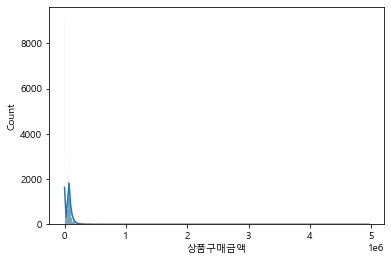

In [4]:
import seaborn as sns
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic')
sns.histplot(data = df, x = '상품구매금액', kde= True)

In [5]:
import scipy.stats as stats

In [6]:
# 귀무가설 : 해당 데이터 분포는 정규분포를 띌 것
# 대립가설 : 해당 데이터 분포는 정규분포를 띄지 않을 것임
stats.normaltest(df['상품구매금액'])

NormaltestResult(statistic=86347.36471094817, pvalue=0.0)

In [7]:
df2 = pd.read_csv('../rawdata/Data03.csv')

In [8]:
df2.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


<AxesSubplot:xlabel='age', ylabel='Count'>

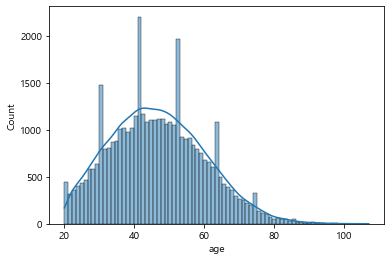

In [11]:
sns.histplot(data=df2, x='age', kde=True)

In [12]:
# missing value가 있으면 Error발생
stats.normaltest(df2['age'])

NormaltestResult(statistic=nan, pvalue=nan)

In [13]:
# 정규분포 아입니다
stats.normaltest(df2['age'].dropna())

NormaltestResult(statistic=808.6960154009449, pvalue=2.476803125887823e-176)